# PSQI总分使用前后变化热力图

In [12]:
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager as fm

In [13]:
#定义中文字体防止乱码
font_path = '../data/SimHei.ttf'  # Replace with the actual font path
font_prop = fm.FontProperties(fname=font_path)

In [14]:
# 受试者名单
categories = ['陈东升', '从建明', '费艳冬', '甘颖婷', '刘汪昊', '藕有娣', '汤荀', '王瑜', '杨雅兰', '韩思洁', '俞志江', '郑慧', '徐悦', '沈发琴', '沈士国']

In [15]:
# 使用前psqi各成分得分
scores_right = {
    'A': np.array([2, 2, 2, 2, 2, 3, 3, 2, 2, 3, 2, 2, 2, 2, 2,3,2,1,3,2,3]),
    'B': np.array([2, 3, 3, 2, 2, 3, 3, 2, 3, 3, 3, 3, 2, 3, 1,3,3,3,3,3,3]),
    'C': np.array([1, 2, 2, 2, 2, 3, 2, 2, 0, 1, 3, 2, 0, 3, 0,2,2,2,3,2,2]),
    'D': np.array([1, 3, 1, 1, 3, 3, 1, 2, 2, 2, 3, 0, 0, 3, 0,3,0,0,3,3,2]),
    'E': np.array([2, 1, 2, 1, 2, 2, 1, 2, 1, 2, 2, 1, 1, 1, 0,2,2,1,2,1,2]),
    'F': np.array([0, 3, 1, 0, 2, 3, 3, 0, 3, 0, 0, 3, 3, 2, 3,3,2,0,3,3,0]),
    'G': np.array([2, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 3, 3, 2, 1,3,2,2,3,3,3]),
}

In [16]:
# 使用后psqi各成分得分
scores_left = {
    'A': np.array([1, 1, 2, 0, 2, 3, 2, 1, 1, 2, 1, 2, 2, 2, 3,2,2,0,3,1,2]),
    'B': np.array([0, 0, 2, 1, 2, 3, 2, 1, 2, 1, 2, 3, 3, 3, 3,3,2,0,2,3,2]),
    'C': np.array([1, 0, 2, 2, 1, 3, 1, 0, 0, 1, 2, 2, 0, 3, 2,2,2,1,3,2,2]),
    'D': np.array([0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 3, 0,2,1,0,3,1,3]),
    'E': np.array([1, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 1, 2,2,1,0,2,1,1]),
    'F': np.array([0, 3, 0, 0, 0, 3, 3, 0, 1, 0, 1, 3, 3, 3, 3,3,0,0,3,2,3]),
    'G': np.array([1, 3, 2, 3, 3, 3, 3, 1, 2, 2, 0, 3, 2, 3, 2,3,2,1,3,2,3]),
}

In [17]:
# 创建字典
data = {}
for i, category in enumerate(categories):
    data[f"{category}使用前"] = list(scores_right[letter][i] for letter in 'ABCDEFG')
    data[f"{category}使用后"] = list(scores_left[letter][i] for letter in 'ABCDEFG')

In [18]:
# 计算总分
data = {key: sum(value) for key, value in data.items()}

In [19]:
# 创建dataframe，调整顺序
df = pd.DataFrame(data.items(), columns=['Item', 'Value'])
df[['Name', 'Status']] = df['Item'].str.split('使用', expand=True)
df = df.pivot(index='Name', columns='Status', values='Value')

order = ['陈东升', '从建明', '费艳冬', '甘颖婷', '刘汪昊', '藕有娣', 
         '汤荀', '王瑜', '杨雅兰', '韩思洁', '俞志江', '郑慧', 
         '徐悦', '沈发琴', '沈士国']

df = df.reindex(order)

In [20]:
# 计算变化值，添加到Dataframe中
df['Change'] = (df['后'] - df['前']) 
df = df[['Change']] 

In [21]:
# 设计颜色
cmap = plt.get_cmap('RdBu_r')


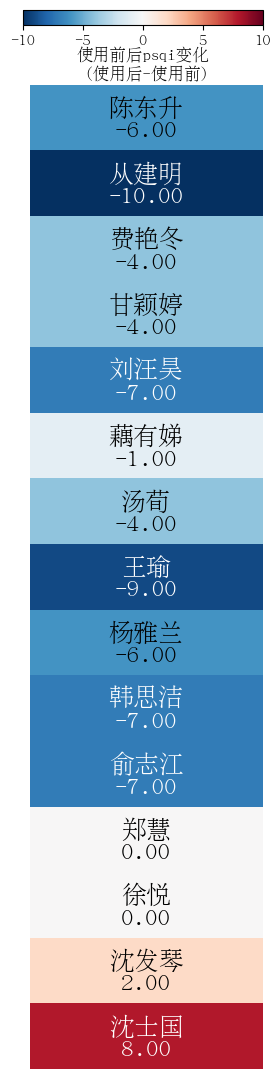

In [22]:
# 设定图片大小
plt.figure(figsize=(3, 15)) 

# 设置全局字体
plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['axes.unicode_minus'] = False  # Ensure proper display of negative signs
plt.rcParams['font.size'] = 12
norm = plt.Normalize(vmin=-10, vmax=10)

# 设置热力图属性
gs = plt.GridSpec(2, 1, height_ratios=[15, 1])  # 15 for heatmap, 1 for colorbar
ax_heatmap = plt.subplot(gs[0])
ax_colorbar = plt.subplot(gs[1])

# 创建热力图
sns.heatmap(df, annot=False, cmap=cmap, cbar=False, 
            vmin=-10, vmax=10, ax=ax_heatmap)

# 添加图例
cbar = plt.colorbar(ax_heatmap.collections[0], cax=ax_colorbar, orientation='horizontal')
cbar.set_label('使用前后psqi变化\n (使用后-使用前)', labelpad=0)

# 删除图例颜色条上的刻度，并修改位置
cbar.ax.yaxis.set_ticks([]) 
cbar.ax.set_position([0.1, 0.92, 0.8, 0.01])


# 填充对应的值
for i in range(df.shape[0]):
    for j in range(df.shape[1]):
        color_value = norm(df.iloc[i, j])
        background_color = cmap(color_value)
        r, g, b, _ = background_color
        luminance = 0.2126 * r + 0.7152 * g + 0.0722 * b
        text_color = 'white' if luminance < 0.5 else 'black'
        
        text = f'{df.index[i]}\n{df.iloc[i, j]:.2f}'
        ax_heatmap.text(j + 0.5, i + 0.5, text, 
                         ha='center', va='center', 
                         fontproperties=font_prop, 
                         fontsize=18, 
                         color=text_color, 
                         bbox=dict(facecolor='gray', alpha=0.0, edgecolor='gray'))

#移除横轴坐标和标签
ax_heatmap.set_xticks([])
ax_heatmap.set_xticklabels([])
ax_heatmap.set_yticks([])
ax_heatmap.set_yticklabels([])
ax_heatmap.set_xlabel('')
ax_heatmap.set_ylabel('')

plt.savefig("../result/使用前后PSQI总分变化热力图.png", dpi=1000)
# plt.savefig("heatmap2.svg")
plt.show()
